In [2]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline

<AxesSubplot:xlabel='Year'>

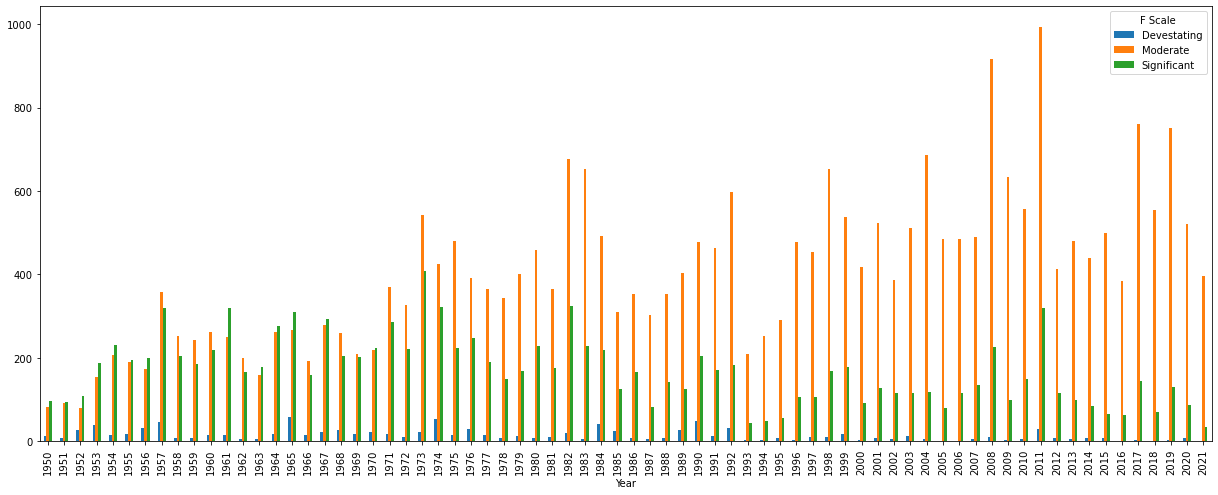

In [3]:
clean_df = pd.read_csv("cleanAllStates.csv")
dic = {0:"Moderate",1:"Significant",2:"Devestating"}
clean_df.replace({"F Scale":dic},inplace=True)
ct1=pd.crosstab(clean_df['Year'],clean_df['F Scale'])
ct1.plot(kind='bar',figsize=(21,8))


<AxesSubplot:title={'center':'Strength of the tornado'}>

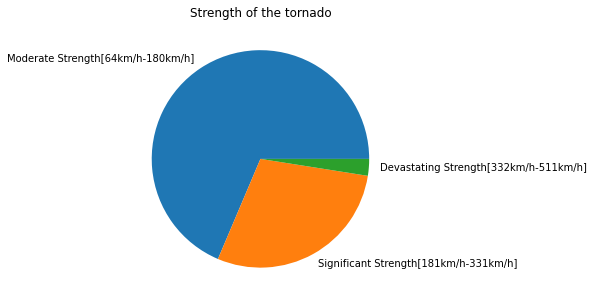

In [108]:
clean_df = pd.read_csv("cleanAllStates.csv")
fig, axes = plt.subplots(figsize=(20,5))
FScaleSeries = clean_df['F Scale'].value_counts()
FScaleSeries = FScaleSeries.rename('')
FScaleSeries.index = ["Moderate Strength[64km/h-180km/h]","Significant Strength[181km/h-331km/h]","Devastating Strength[332km/h-511km/h]"]
FScaleSeries.plot(kind = 'pie', ax = axes,title = 'Strength of the tornado')

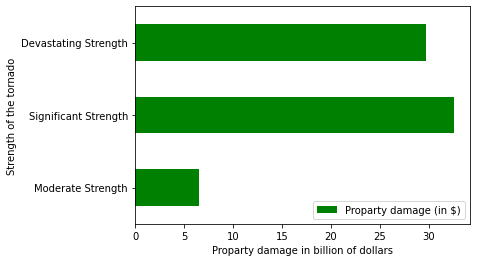

In [109]:
groupbyDf = clean_df[['F Scale','Proparty damage (in $)']].groupby('F Scale').sum()/1000000000
groupbyDf.index = ["Moderate Strength","Significant Strength","Devastating Strength"]
ax = groupbyDf.plot.barh(color = 'g')
ax.set(xlabel='Proparty damage in billion of dollars', ylabel='Strength of the tornado')
plt.show()




In [46]:
clean_df

,Month-Day,Year,F Scale,Length(in miles),Width(in feet),Injury,Fatality,Proparty damage (in $),State
0,Aug. 31,2021,0,1.71,25.0,0,0,10000,alabama
1,Aug. 31,2021,0,0.65,125.0,0,0,100000,alabama
2,Aug. 31,2021,0,0.89,20.0,0,0,20000,alabama
3,Apr. 24,2021,0,0.42,100.0,0,0,25000,alabama
4,Apr. 24,2021,0,4.09,150.0,2,0,100000,alabama
...,...,...,...,...,...,...,...,...,...
42415,May. 28,1953,1,38.20,433.0,0,0,2500,wyoming
42416,May. 08,1952,0,2.00,100.0,0,0,30,wyoming
42417,Jun. 14,1950,0,0.20,10.0,0,0,30,wyoming
42418,Jun. 07,1950,0,0.20,10.0,0,0,30,wyoming


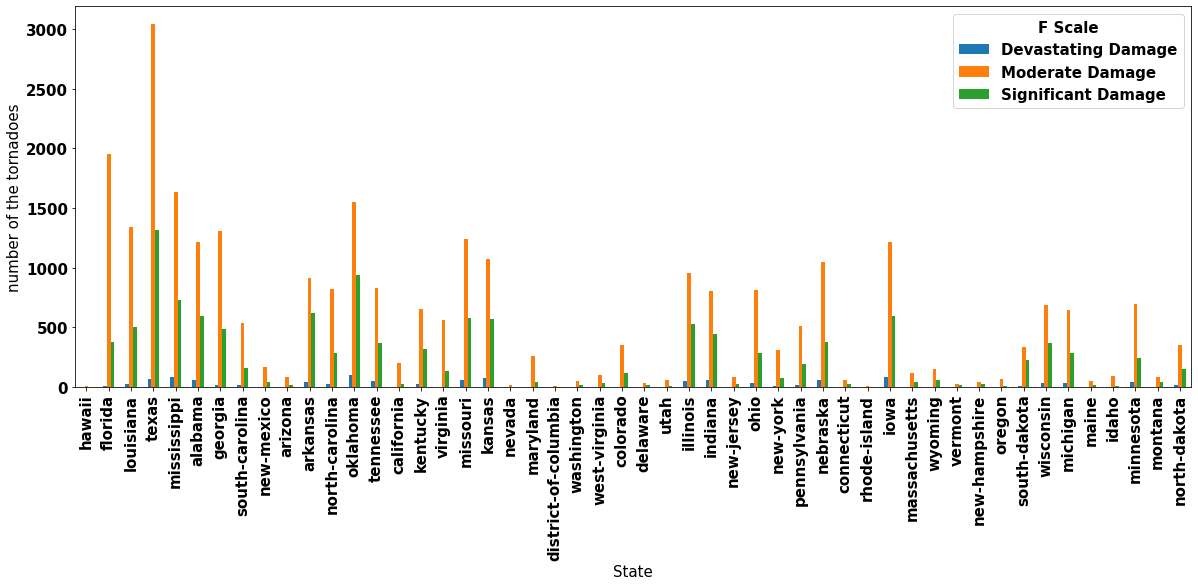

In [141]:
fscaleChange = clean_df.copy()
order_state_by_latitude = ['hawaii','florida','louisiana','texas','mississippi','alabama'
                          ,'georgia','south-carolina','new-mexico','arizona','arkansas','north-carolina'
                          ,'oklahoma','tennessee','california','kentucky','virginia','missouri','kansas'
                          ,'nevada','maryland','district-of-columbia','washington','west-virginia','colorado'
                          ,'delaware','utah','illinois','indiana','new-jersey','ohio','new-york',
                          'pennsylvania','nebraska','connecticut','rhode-island','iowa','massachusetts'
                          ,'wyoming','vermont','new-hampshire','oregon','south-dakota','wisconsin','michigan'
                          ,'maine','idaho','minnesota','montana','north-dakota']
dic = {0:"Moderate Damage",1:"Significant Damage",2:"Devastating Damage"}
fscaleChange.replace({"F Scale":dic},inplace=True)
ct = pd.crosstab(fscaleChange['State'],fscaleChange['F Scale'])
font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
ax = ct.loc[order_state_by_latitude].plot(kind = 'bar',figsize = (20,7))
ax.set(ylabel='number of the tornadoes')
plt.show()

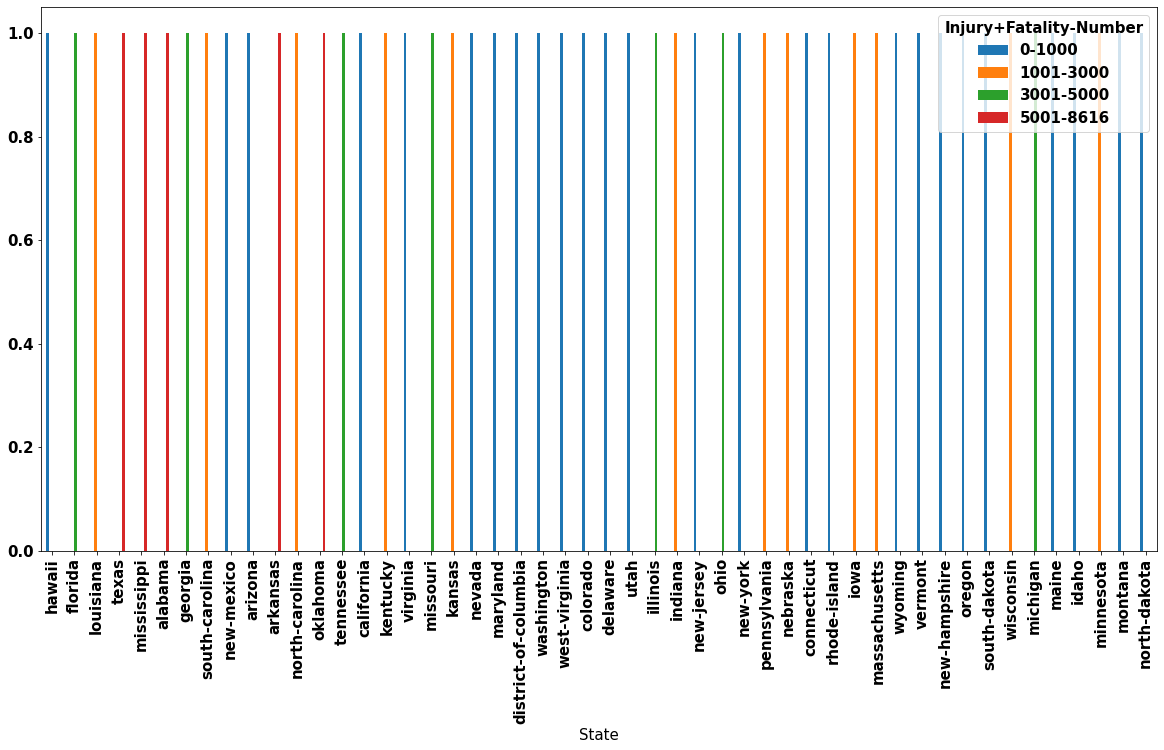

In [216]:
groupbyDf = clean_df[['State','Injury','Fatality']].groupby('State').sum()
groupbyDf['Injury+Fatality'] = groupbyDf.iloc[:,-2:].sum(axis = 1)
groupbyDf = groupbyDf.reset_index()
bins = [-1,1000,3000,5000,8616]
labels = ["0-1000",'1001-3000','3001-5000','5001-8616']
groupbyDf['Injury+Fatality-Number'] = pd.cut(groupbyDf['Injury+Fatality'], bins = bins,labels=labels)
ct = pd.crosstab(groupbyDf['State'],groupbyDf['Injury+Fatality-Number'])
ax = ct.loc[order_state_by_latitude].plot(kind = 'bar',figsize = (20,10))
plt.show()
